# Uczenie nienadzorowane

Do tej pory zajmowaliśmy się uczeniem nadzorowanym (ang. *supervised*), tj. takimi przypadkami, gdy zbiór trenujący składał się z dwóch zmiennych `X` i `y`, a naszym zadaniem było przewidzenia `y` na podstawie danych z `X`. Ponadto poznaliśmy odpowiednie metryki, które pozwalały nam zmierzyć jak dobrze (lub) źle działają modele, które wytrenowaliśmy.

Przypomnijmy, że na uczenie maszynowe składają się trzy paradygmaty:
 * supervised learning
 * unsupervised learning
 * reinforcement learning
 
Dzisiejsze zajęcia są poświęcone drugiemu paradygmatowi, czyli uczeniu nienadzorowanym, a dokładniej automatycznemu klastrowaniu. Do klastrowania służą m.in. następujące algorytmy:
 * K-średnich (ang. *k-means*)
 * [DB-SCAN](https://en.wikipedia.org/wiki/DBSCAN)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Zadanie 0**: wczytaj do zmiennej `points` zbiór danych z pliku `points.csv`. Uwaga: kolumny są rozdzielone spacją. Plik nie zawiera nagłówka.

In [2]:
points  = pd.read_csv('points.csv', sep=' ', header=None)


Narysujmy wykres z wyżej wczytanych punktów.

<AxesSubplot:xlabel='0', ylabel='1'>

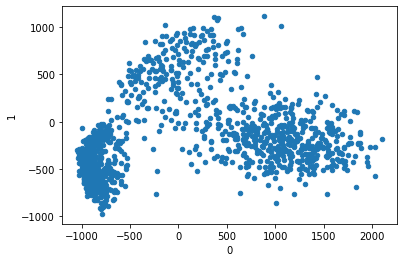

In [3]:
xs = points[0]
ys = points[1]

points.plot(kind='scatter', x=0, y=1)

**zadanie 1** Ile dostrzegasz rozdzielnych grup punktów na powyższym wykresie?

In [5]:
# na pewno 3 grupy

Podstawowym akgorytmem do klastrowania danych jest $k$-średnich albo k-means, który został omówiony na wykładzie.  Oczywiście biblioteka `sklearn` zawiera implementację tego algorytmu.

**zadanie 2** Wczytaj z biblioteki `sklearn.cluster` klasę `KMeans`.

In [4]:
from sklearn.cluster import KMeans

Algorytm k-means  wymaga podania oczekiwanej liczby klas, dlatego podczas tworzenia obiektu `KMeans` musimy podać parametr `n_clusters`. W poniższym przykładzie ustawiamy powyższy parametr na 3.

In [5]:
kmeans = KMeans(n_clusters=3)

**zadanie 3** Wywołaj metodę `fit` na obiekcie `kmeans` i jako parametr przekaż zmienną `points`. W taki sposób wytrenujesz model.

In [6]:
kmeans.fit(points)

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

**zadanie 4** Mając wytrenowany model k-średnich, możemy wyznaczyć klaster, do którego został przydzielony każdy z punktów. Służy do tego komenda *predict*. Wywołaj tę komendę na zmiennej *points* i zapisz wynik do zmiennej *clusters*.

In [7]:
clusters = kmeans.predict(points)
clusters

array([0, 0, 0, ..., 2, 2, 2])

Wyświetlmy, w jaki sposób model podzielił punkty:

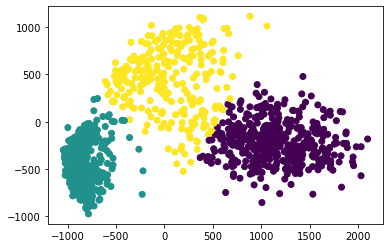

In [8]:
plt.scatter(x=points[0], y=points[1], c=clusters)
plt.show()

Informacje o centroidach są przechowywwane w atrybucie `cluster_centers_`:

In [9]:
for idx, centroid in enumerate(kmeans.cluster_centers_):
    print("Claster ID: {}\tX: {}\tY:{}".format(idx, centroid[0], centroid[1]))

Claster ID: 0	X: 1158.9296227871432	Y:-212.2805521175457
Claster ID: 1	X: -844.3076877296984	Y:-450.07153180895205
Claster ID: 2	X: 60.612343548206	Y:444.8494302023745


**zadanie 5** Sprawdź, w jaki sposób podzieli zbiór punktów model k-średnich, jeżeli ustawimy liczbę klastrów na 2 i 4.

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


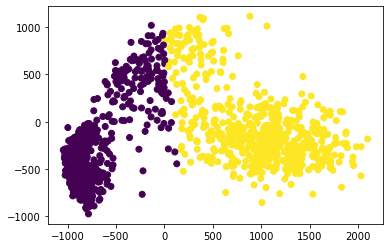

In [10]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(points)
clusters2 = kmeans2.predict(points)
clusters2
plt.scatter(x=points[0], y=points[1], c=clusters2)
plt.show()

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


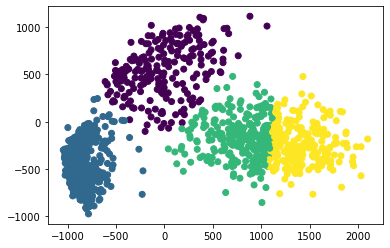

In [11]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(points)
clusters4 = kmeans4.predict(points)
clusters4
plt.scatter(x=points[0], y=points[1], c=clusters4)
plt.show()

Algorytm k-średnich minimalizuje sumę odległości do najbliżsego centroidu, co możemy traktować jako funkcje kosztu i wykorzystać to porównania pomiędzy modelami z różnymi liczbami klastrów.

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

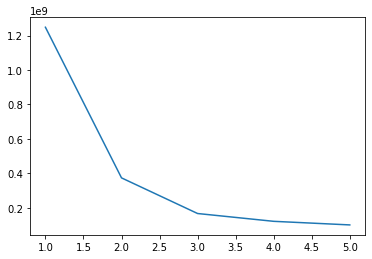

In [12]:
n_clusters = [1, 2, 3, 4, 5]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters=n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

Powyższy wykres przedstawia zależność pomiędzy liczbą klastrów, a funkcją kosztu. Można łatwo zauważyć, powyżej 3 klastrów zależność na wygładza się. Stąd, liczba 3 wydaje się być najlepszym wyborem.

Drugim popularnym algorytmem jest DB-SCAN, który nie wymaga `a priori` podania liczby klastrów, którą sam ją wyznacza. Ponadto, cechą tego modelu jest możliwość pominięcia niektórych punktów, które są oddalone od skupisk.

In [13]:
from sklearn.cluster import DBSCAN

Model DB-SCAN przyjmuje dwa parametry: eps - odległość pomiędzy punktami i minimalną liczbę punktów potrzebna do utworzenia klastra.

In [14]:
db = DBSCAN(eps=130, min_samples=10)
labels = db.fit_predict(points)
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

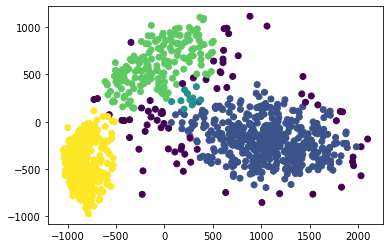

In [15]:
plt.scatter(x=points[0], y=points[1], c=labels)
plt.show()

**zadanie 6** Przeskaluj dane, tak aby miały rozkład standardowy (średnia = 0 , std = 1). I uruchom model SB-SCAN i k-średnich. Czy normalizacja zmieniła coś?

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(points) 
points_scaled = scaler.transform(points)

#points_scaled.mean(axis = 0) # sprawdzenie array([-1.42108547e-16,  8.28966525e-17]) => bliskie 0, ok
#points_scaled.std(axis = 0) # sprawdzenie array([1., 1.]) => ok bo 1



array([1., 1.])

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


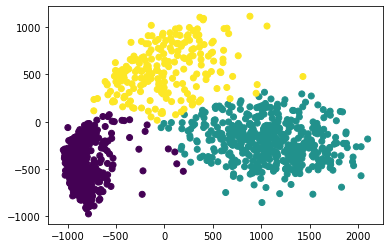

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(points_scaled)
clusters_after_scale = kmeans.predict(points_scaled)
clusters_after_scale
plt.scatter(x=points[0], y=points[1], c=clusters_after_scale)
plt.show()

# na wykresie widać ić,po przeskalowaniu danych
#trochę inaczej punkty ('graniczne') zostały zakwalifikowane,
#aniżeli na wykresie z zadania 4

In [20]:
db = DBSCAN(eps=130, min_samples=10)
labels_after_scale = db.fit_predict(points_scaled)
labels_after_scale

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

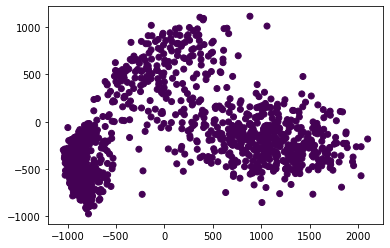

In [21]:
plt.scatter(x=points[0], y=points[1], c=labels_after_scale)
plt.show()

# po przeskalownaiu wszytsko do 'jednego wora'.    
# natomiast jeśli jest za duże rozporszenie danych, to
# przy małej liczbie klastrów, wszytsko może zostać uznznae za szum, 
# ponieważ algorytm nie znajdzie wartości reprezentującej (punkt rdzenny dla danego klastra).


### Redukcja wymiaru

Jedną z wad algorytmu k-średnich jest czas trenowania, który rośnie z wymiarem danych, jak ich z liczbą przykładów trenujących. Podstawową techniką w takim przypadku jest zmniejszenie wymiarowości danych. Najprostszą techniką jest [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [22]:
from sklearn.decomposition import PCA


Ściągnijmy zbiór dancych MNIST, który pojawił się na naszych zajęciach.

In [24]:
#mnist = fetch_mldata('MNIST original')          # nie mogłam tego zainstalować, dlatego fetch_openml('mnist_784')
#X = mnist.data.astype('float64')
#y = mnist.target

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
y = mnist.target

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [26]:
#mnist.data.head(1)

In [24]:
#y.head(5)

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [26]:
#X.shape

(70000, 784)

In [27]:
#y.shape

(70000,)

In [28]:
#mnist.data.shape

(70000, 784)

Podczas tworzeania PCA, możemy podać wyjsciową liczbę wymiarów (argument *n_components*). 

In [29]:
pca = PCA(n_components=10)
pca.fit(X) # fit 

PCA(n_components=10)

In [30]:
mnist_pca = pca.transform(X)
mnist_pca


array([[ 122.25526033, -316.23382661,  -51.1318133 , ...,  188.87770794,
        -358.95245943,  203.25971905],
       [1010.49400323, -289.96362548,  576.12076673, ..., -102.23115291,
          34.80618825,  151.41217641],
       [ -58.99594019,  393.69734062, -161.99799226, ...,  374.26918366,
         -78.57434295, -192.87309879],
       ...,
       [-271.50700853,  590.07843804,  341.36893592, ..., -344.74308153,
         -52.23174454, -803.57925949],
       [-310.22483016, -116.72709877,  635.7198573 , ...,  144.84496636,
         285.13816575, -204.60016036],
       [1058.86213067,  -83.39256541,  731.34230248, ..., -421.38466182,
         141.15880391,   67.05252416]])

In [31]:
#mnist_pca.shape

(70000, 10)

**zadanie 7** Wytrenuj K-Means na wyjściu z PCA. Ustaw liczbę klastrów na 10. Ponadto zapisz do `mnist_clasters` numer klastra, do którego został on przydzielony.

In [32]:
kmeans10_pca = KMeans(n_clusters=10)
kmeans10_pca.fit(mnist_pca)
mnist_clasters = kmeans10_pca.predict(mnist_pca)
mnist_clasters 



C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([9, 7, 5, ..., 4, 0, 3])

In [33]:
#mnist_clasters.shape

(70000,)

**zadanie 8** Zmienna `y` zawiera informację o prawidłowych oznaczeniach: tj. liczby od 0 do 9 (włącznie). Dla każdej cyfry *i* znajdz klaster *j*, w którym znajduje się najwięcej cyfr *i*.

In [34]:
#y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [35]:
str_mnist_clasters = np.array([str(i) for i in mnist_clasters])
str_mnist_clasters

array(['9', '7', '5', ..., '4', '0', '3'], dtype='<U1')

In [36]:
df = pd.DataFrame({'pred': str_mnist_clasters, 'ref': y})
df_confusion_matrix = pd.pivot_table(df, index='ref', columns='pred', aggfunc=len)
df_confusion_matrix   # dla kazdego wiersza znalezsc max i to bedzie odpowiedz na pytanie z zadania 8
# lub
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y, mnist_clusters_str)


pred,0,1,2,3,4,5,6,7,8,9
ref,,,,,,,,,,
0,22.0,218.0,3559.0,193.0,9.0,42.0,21.0,2669.0,27.0,143.0
1,3553.0,6.0,NaN,6.0,7.0,4.0,8.0,NaN,4282.0,11.0
2,314.0,412.0,30.0,258.0,74.0,204.0,4753.0,151.0,624.0,170.0
3,118.0,4519.0,13.0,38.0,44.0,197.0,247.0,159.0,642.0,1164.0
4,375.0,NaN,16.0,277.0,2048.0,3738.0,36.0,16.0,303.0,15.0
5,914.0,1891.0,90.0,84.0,309.0,453.0,15.0,543.0,487.0,1527.0
6,210.0,39.0,91.0,5330.0,2.0,107.0,216.0,188.0,622.0,71.0
7,297.0,4.0,20.0,4.0,4185.0,2090.0,54.0,15.0,616.0,8.0
8,626.0,1181.0,46.0,68.0,268.0,213.0,94.0,64.0,526.0,3739.0


In [37]:
df_confusion_matrix.idxmax(axis = 1) # tj. odpowiedź na zadanie 8: dla cyfry 0 -klaster 2
                                                                   #dla cyfry 1 - klaster 8 itd.

ref
0    2
1    8
2    6
3    1
4    5
5    1
6    3
7    4
8    9
9    5
dtype: object

In [38]:
# wykraczajac poza treść zadania domowego szukam odpowiedzi na pytanie:
# która cyfra pojawia sie najcześciej w danym klastrze    
# co jest zgodne z wyżej wykonaną macierzą błedu (przy pomocy funkcji pivot)
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(mnist_clasters)
for i in range(10):
    mask = (mnist_clasters == i)
    labels[mask] = mode(y[mask])[0]
    print(i)
    print(mask)
    print(labels[mask])
    print(mode(y[mask]))

0
[False False False ... False  True False]
[1 1 1 ... 1 1 1]
ModeResult(mode=array(['1'], dtype=object), count=array([3553]))
1
[False False False ... False False False]
[3 3 3 ... 3 3 3]
ModeResult(mode=array(['3'], dtype=object), count=array([4519]))
2
[False False False ... False False False]
[0 0 0 ... 0 0 0]
ModeResult(mode=array(['0'], dtype=object), count=array([3559]))
3
[False False False ... False False  True]
[6 6 6 ... 6 6 6]
ModeResult(mode=array(['6'], dtype=object), count=array([5330]))
4
[False False False ...  True False False]
[7 7 7 ... 7 7 7]
ModeResult(mode=array(['7'], dtype=object), count=array([4185]))
5
[False False  True ... False False False]
[4 4 4 ... 4 4 4]
ModeResult(mode=array(['4'], dtype=object), count=array([3738]))
6
[False False False ... False False False]
[2 2 2 ... 2 2 2]
ModeResult(mode=array(['2'], dtype=object), count=array([4753]))
7
[False  True False ... False False False]
[0 0 0 ... 0 0 0]
ModeResult(mode=array(['0'], dtype=object), count

**zadanie 9** mając wyznaczone klasy z poprzedniego zadania, sumuj liczbę elementów w najpopularniejszym klastrze.

In [39]:
df_confusion_matrix.idxmax(axis = 1).mode()
# czyli najbardziej popularny klaster , bo powtarzający się dla cyfr 0-9 (ref) => to klaster nr 1 i klaster nr 5

0    1
1    5
dtype: object

In [40]:
df_confusion_matrix['1'].sum()

8354.0

In [41]:
df_confusion_matrix['5'].sum()

10416.0

In [42]:
# tj. dla wszystkich klastrów

#map = {}
#for j in mnist_clasters:
#   map[j] = map.get(j, 0) + 1
#print(map)

{9: 6946, 7: 3832, 5: 10416, 0: 6577, 4: 9596, 6: 5463, 8: 8623, 1: 8354, 3: 6273, 2: 3920}


**zadanie 10** Oblicz accuracy biorąc wynik z poprzedniego zadania.

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y, str_mnist_clasters)

0.04931428571428571

**zadanie 11** Spróbuj podwyższych wynik, stosując np. normalizację lub zmieniając parametry.

In [53]:
#wcss=[]
#for i in range(1,11):
#    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++')
#    kmeans_pca.fit(mnist_pca)
#   wcss.append(kmeans_pca.inertia_)
#print(wcss)  
#plt.figure(figsize= (10, 8))
#plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
#plt.xlabel('Liczba kalstrow')
#plt.ylabel('wcss')
#plt.title('K-means z PCA')
#plt.show()


# wezme 3 klastry

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

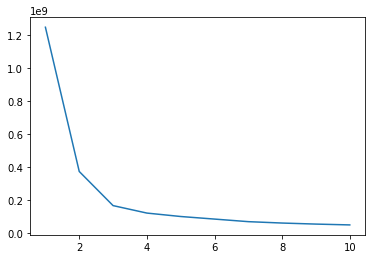

In [44]:
n_clusters = [1, 2, 3, 4, 5, 6, 7, 8 ,9 ,10]
inertias = []

for n_cluster in n_clusters:
    model = KMeans(n_clusters=n_cluster)
    model.fit(points)
    inertias.append(model.inertia_)

plt.plot(n_clusters, inertias)
plt.show()

# tutaj sprawdzam i tez sprobuje dla 3 klastrow

In [45]:
kmeans3_pca = KMeans(n_clusters=3)  #zmiana tylko klastrów, w PCA nadal 10 komponentów
kmeans3_pca.fit(mnist_pca)
clusters3 = kmeans3_pca.fit_predict(mnist_pca)
clusters3
str_clusters3 = np.array([str(i) for i in clusters3])
from sklearn.metrics import accuracy_score
accuracy_score(y, str_clusters3) # zdecydowanie lepiej

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.1406

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X) 
X_scaled = scaler.transform(X)
#X_scaled.mean(axis = 0) # sprawdzenie array's => bliskie 0, ok
#X_scaled.std(axis = 0) 
pca = PCA(n_components=10)
pca.fit(X_scaled)
mnist_pca_scaled = pca.transform(X_scaled)
mnist_pca_scaled
kmeans10_pca_scaled = KMeans(n_clusters=10).fit(mnist_pca_scaled)
mnist_clasters_scaled = kmeans10_pca.predict(mnist_pca_scaled)
mnist_clasters_scaled
str_mnist_clasters_scaled = np.array([str(i) for i in mnist_clasters_scaled])
from sklearn.metrics import accuracy_score
accuracy_score(y, str_mnist_clasters_scaled) # po standaryzacji - lepiej niż przy wyjsciowym pca10 i kmenas10, 
                                                #ale gorzej niz niz przy pca10 i kemans3

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.0994

In [47]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
transformer.fit(X) 
X_transformered = transformer.transform(X)
pca = PCA(n_components=10)
pca.fit(X_transformered)
mnist_pca_transformered = pca.transform(X_transformered)
mnist_pca_transformered
kmeans10_pca_transformered = KMeans(n_clusters=10).fit(mnist_pca_transformered)
mnist_clasters_transformered = kmeans10_pca.predict(mnist_pca_transformered)
mnist_clasters_transformered
str_mnist_clasters_transformered = np.array([str(i) for i in mnist_clasters_transformered])
from sklearn.metrics import accuracy_score
accuracy_score(y, str_mnist_clasters_transformered) # jak wyzej, normalizacja <=> standaryzacja to samo


C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.0994

In [48]:
pca = PCA(n_components=2)
pca.fit(X)
mnist_pca2 = pca.transform(X)
mnist_pca2
kmeans3_pca2 = KMeans(n_clusters=3)  
kmeans3_pca2.fit(mnist_pca2)
clusters3_pca2 = kmeans3_pca.fit_predict(mnist_pca2)
clusters3_pca2
str_clusters3_pca2 = np.array([str(i) for i in clusters3_pca2])
from sklearn.metrics import accuracy_score
accuracy_score(y, str_clusters3_pca2) # najwyzszy(najlepszy) jak dotad wynik przy pca2 i 3 klastrach

C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pzagorski\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.1586142857142857

**Gratuluję!**